# Regularization

In [16]:
library(ISLR)

In [64]:
Hitters = na.omit(Hitters)
x = model.matrix(Salary~.,Hitters)[,-1]
y = Hitters$Salary

## Ridge Regression

In [20]:
library(glmnet)
grid = 10^seq(10,-2,length=100)
ridge.mod = glmnet(x,y,alpha=0,lambda=grid)

grid is vector of lambda, from 10^10 to 10^-2 with equal spacing of length = 100

In [21]:
dim(coef(ridge.mod))

[1]  20 100

In [22]:
ridge.mod$lambda[50]

[1] 11497.57

In [23]:
coef(ridge.mod)[,50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

l2 norm of parameters at 50th lambda == 11497

In [24]:
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 6.360612

In [25]:
ridge.mod$lambda[60]

[1] 705.4802

In [26]:
coef(ridge.mod)[,60]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

l2 norm of parameters at 60th lambda == 705

In [27]:
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 57.11001

Predictions by ridge.mod at lambda==50

In [29]:
predict(ridge.mod,s=50,type='coefficients')[1:20,]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

## Train/test set split for test error calculation

In [100]:
set.seed(3)
train = sample(1:nrow(x),nrow(x)/2)
test=(-train)
y.test=y[test]

In [38]:
#Fit glm on x and y train sets by ridge regression, using lambda of grid sequence and dump predictors as param <=1e-12
ridge.mod = glmnet(x[train,],y[train],alpha=0,lambda=grid,thresh=1e-12)
#Predict on test sets using lambda=4
ridge.pred = predict(ridge.mod,s=4,newx=x[test,])
#Test MSE of ridge.mod on y test set
mean((ridge.pred-y.test)^2)

[1] 142199.2

In [40]:
#Test MSE of intercept, beta_0 on y test set
mean((mean(y[train])-y.test)^2)

[1] 224669.9

Test MSE of intercept > Test MSE of ridge.mod with lambda == 4

In [42]:
#Test MSE of predictions using x test set with lambda == 1e10
ridge.pred = predict(ridge.mod,s=1e10,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 224669.8

Test MSE of intercept model ~= Test MSE of ridge.mod with very large lambda, when all predictor parameters approach 0

In [46]:
#Test MSE of predictions using x test with lambda == 0
ridge.pred = predict(ridge.mod,s=0,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 167789.8

Lambda tuning with CV

In [70]:
#Unpenalized model
lm(y~x,subset=train)
predict(ridge.mod,s=0,type='coefficients')[1:20,]


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
   274.0145      -0.3521      -1.6377       5.8145       1.5424       1.1243  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
     3.7287     -16.3773      -0.6412       3.1632       3.4008      -0.9739  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    -0.6005       0.3379     119.1486    -144.0831       0.1976       0.6804  
    xErrors  xNewLeagueN  
    -4.7128     -71.0951  


(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 274.2089049   -0.3699455   -1.5370022    5.9129307    1.4811980    1.0772844 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   3.7577989  -16.5600387   -0.6313336    3.1115575    3.3297885   -0.9496641 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  -0.5694414    0.3300136  118.4000592 -144.2867510    0.1971770    0.6775088 
      Errors   NewLeagueN 
  -4.6833775  -70.1616132

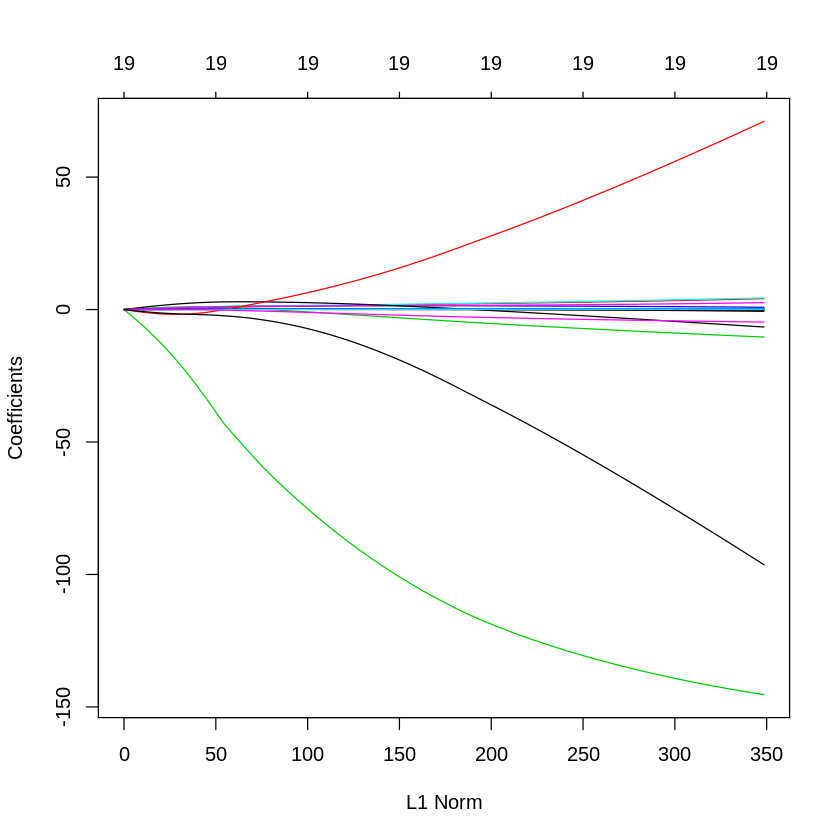

In [108]:
# set.seed(3)
cv.fit=glmnet(x[train,],y[train],alpha=0)
plot(cv.fit)

In [77]:
# ridge.pred = predict(ridge.mod,s=cv.out$lambda.min,newx=x[test,])

In [109]:
str(cv.fit)

List of 12
 $ a0       : Named num [1:100] 557 548 547 546 545 ...
  ..- attr(*, "names")= chr [1:100] "s0" "s1" "s2" "s3" ...
 $ beta     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1900] 0 1 2 3 4 5 6 7 8 9 ...
  .. ..@ p       : int [1:101] 0 19 38 57 76 95 114 133 152 171 ...
  .. ..@ Dim     : int [1:2] 19 100
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:19] "AtBat" "Hits" "HmRun" "Runs" ...
  .. .. ..$ : chr [1:100] "s0" "s1" "s2" "s3" ...
  .. ..@ x       : num [1:1900] 1.82e-36 6.64e-36 2.01e-35 1.03e-35 1.15e-35 ...
  .. ..@ factors : list()
 $ df       : int [1:100] 19 19 19 19 19 19 19 19 19 19 ...
 $ dim      : int [1:2] 19 100
 $ lambda   : num [1:100] 295661 269395 245463 223657 203788 ...
 $ dev.ratio: num [1:100] 8.43e-36 1.39e-02 1.52e-02 1.67e-02 1.83e-02 ...
 $ nulldev  : num 27383016
 $ npasses  : int 609
 $ jerr     : int 0
 $ offset   : logi FALSE
 $ call     : language glmnet(x = x[train, ], y = y[train], alpha = 0)
 $ 

In [104]:
str(cv.out)

List of 12
 $ a0       : Named num [1:100] 557 548 547 546 545 ...
  ..- attr(*, "names")= chr [1:100] "s0" "s1" "s2" "s3" ...
 $ beta     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1900] 0 1 2 3 4 5 6 7 8 9 ...
  .. ..@ p       : int [1:101] 0 19 38 57 76 95 114 133 152 171 ...
  .. ..@ Dim     : int [1:2] 19 100
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:19] "AtBat" "Hits" "HmRun" "Runs" ...
  .. .. ..$ : chr [1:100] "s0" "s1" "s2" "s3" ...
  .. ..@ x       : num [1:1900] 1.82e-36 6.64e-36 2.01e-35 1.03e-35 1.15e-35 ...
  .. ..@ factors : list()
 $ df       : int [1:100] 19 19 19 19 19 19 19 19 19 19 ...
 $ dim      : int [1:2] 19 100
 $ lambda   : num [1:100] 295661 269395 245463 223657 203788 ...
 $ dev.ratio: num [1:100] 8.43e-36 1.39e-02 1.52e-02 1.67e-02 1.83e-02 ...
 $ nulldev  : num 27383016
 $ npasses  : int 609
 $ jerr     : int 0
 $ offset   : logi FALSE
 $ call     : language glmnet(x = x[train, ], y = y[train], alpha = 0)
 $ 